In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import os,shutil
import random
import tensorflow as tf

In [2]:
df = pd.read_csv("D:\\DATA SCIENCE\\Kaggle Projects\\age_gender.csv")
df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [3]:
df=df.drop(["img_name"],axis=1)

In [4]:
ethnicity_mapping = {0:"White", 1:"Black", 2:"Asian", 3:"Indian", 4:"Hispanic"}
gender_mapping = {0:"Male", 1:"Female"}

In [5]:
def get_image(row):
    age = row['age']
    ethnicity = row['ethnicity']
    gender = row['gender']
    image = np.array(row['pixels'].split(), 'float64')
    image = image.reshape(48, 48) / 255.0

    return image, age, ethnicity, gender

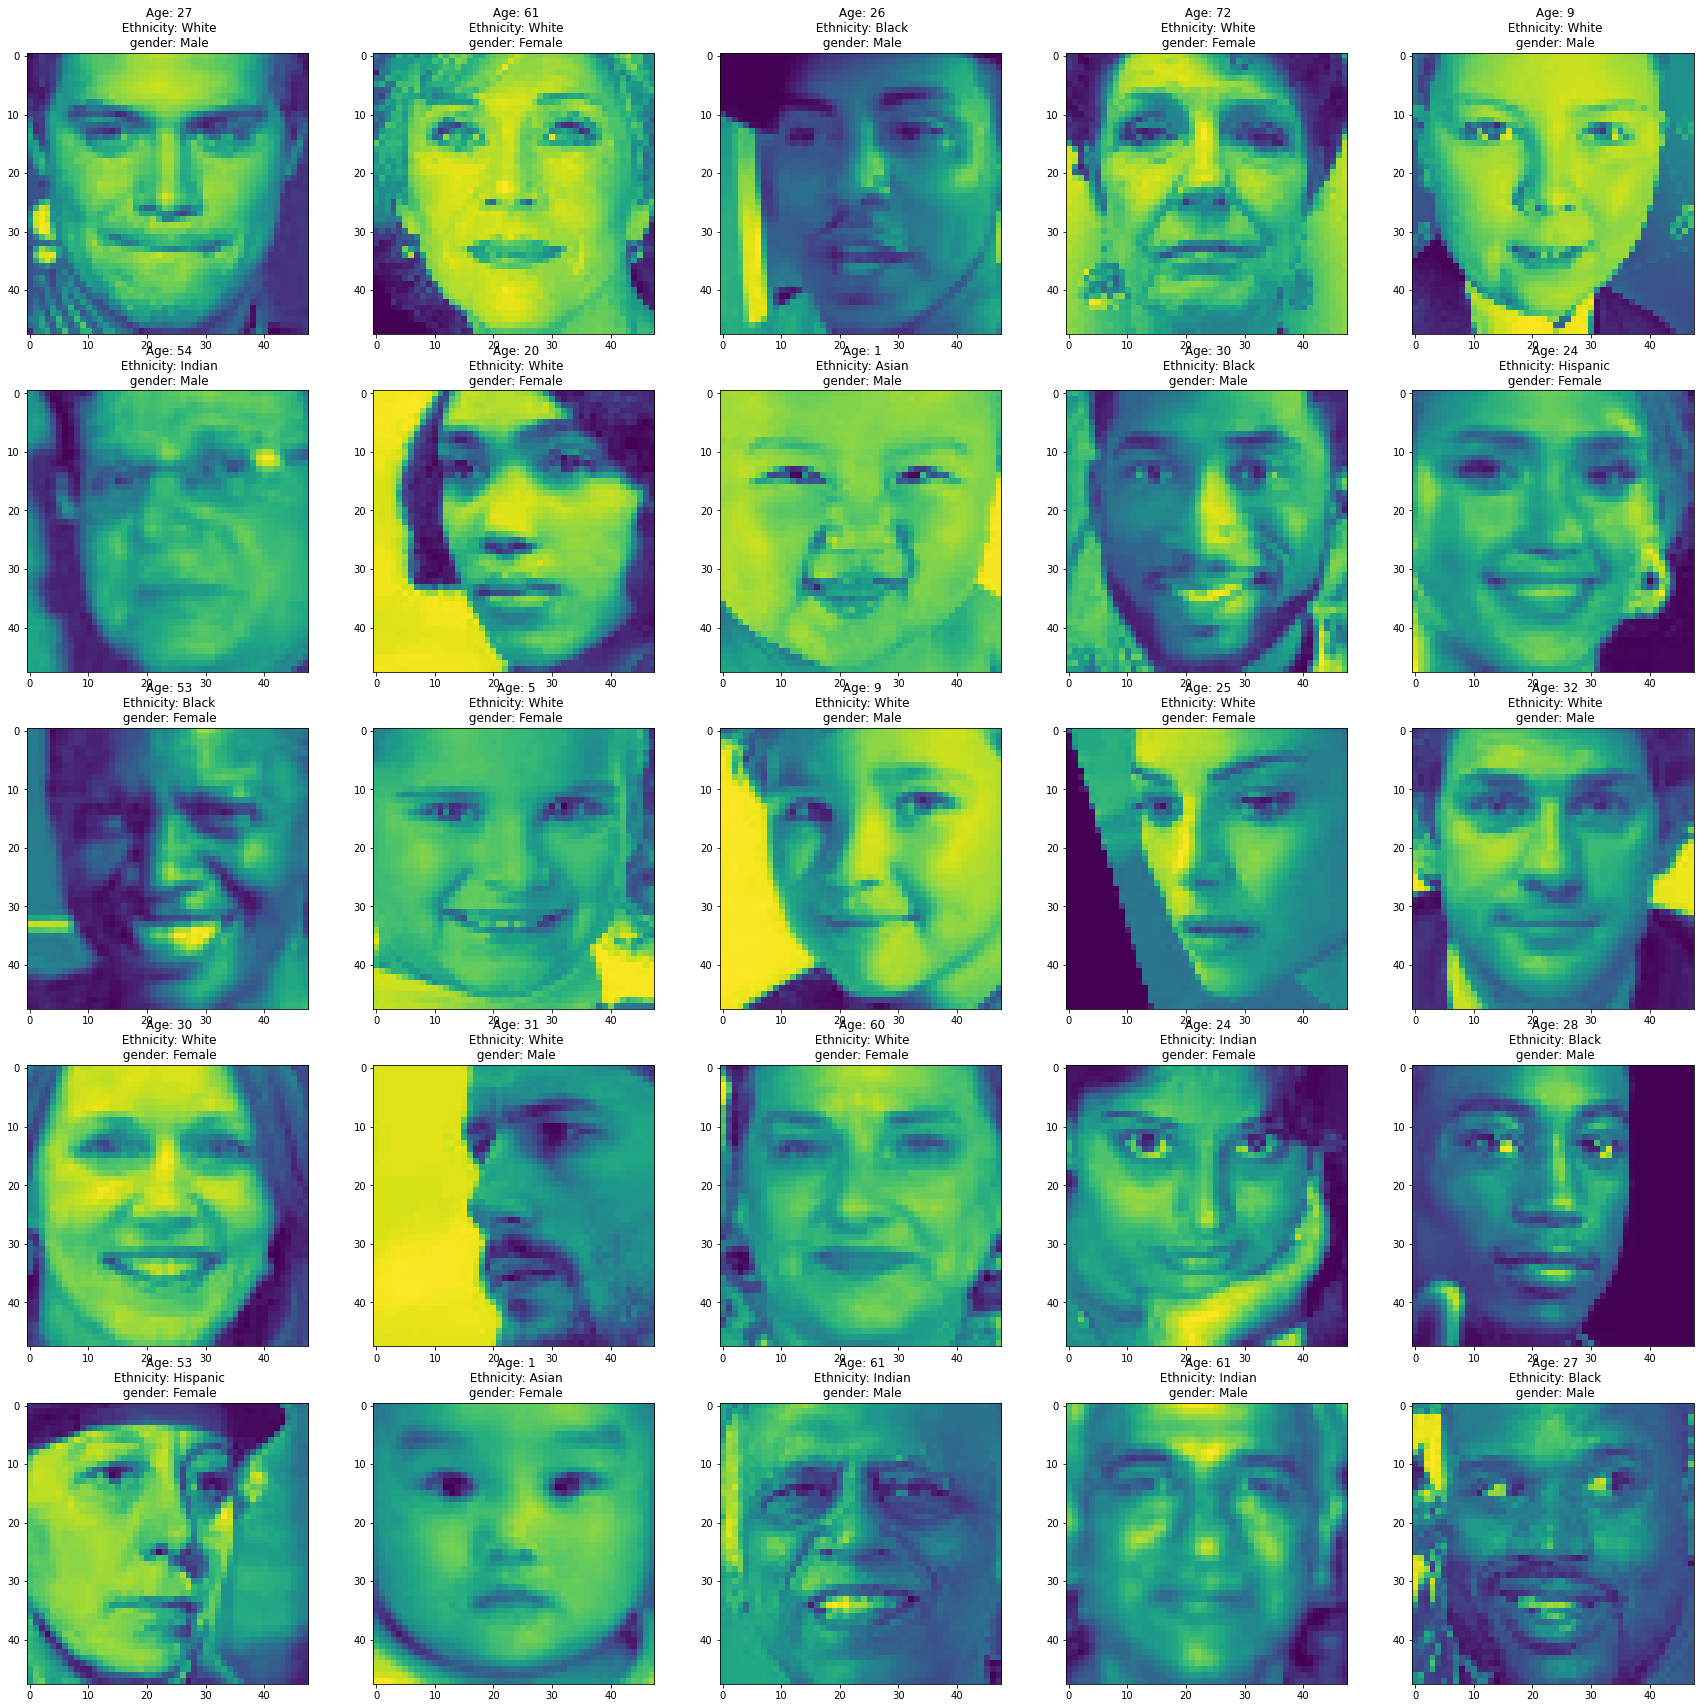

In [24]:
def show_images():
  plt.figure(figsize=(30, 30))

  for i in range(25):
    index = np.random.randint(0, len(df))
    image, age, ethnicity, gender = get_image(df.iloc[index])

    plt.subplot(5, 5, i+1)
    plt.imshow(image)
    plt.title(' Age: {}\n Ethnicity: {}\n gender: {}'.format(age, ethnicity_mapping[ethnicity], gender_mapping[gender]))

  plt.show()
show_images()

In [6]:
df['pixels']=df['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))

In [7]:
df['pixels']=df['pixels'].apply(lambda x:x/255)

In [8]:
x=np.array(df['pixels'].tolist())

In [9]:
x.shape

(23705, 2304)

In [10]:
x=x.reshape(x.shape[0],48,48,1)

In [11]:
x.shape

(23705, 48, 48, 1)

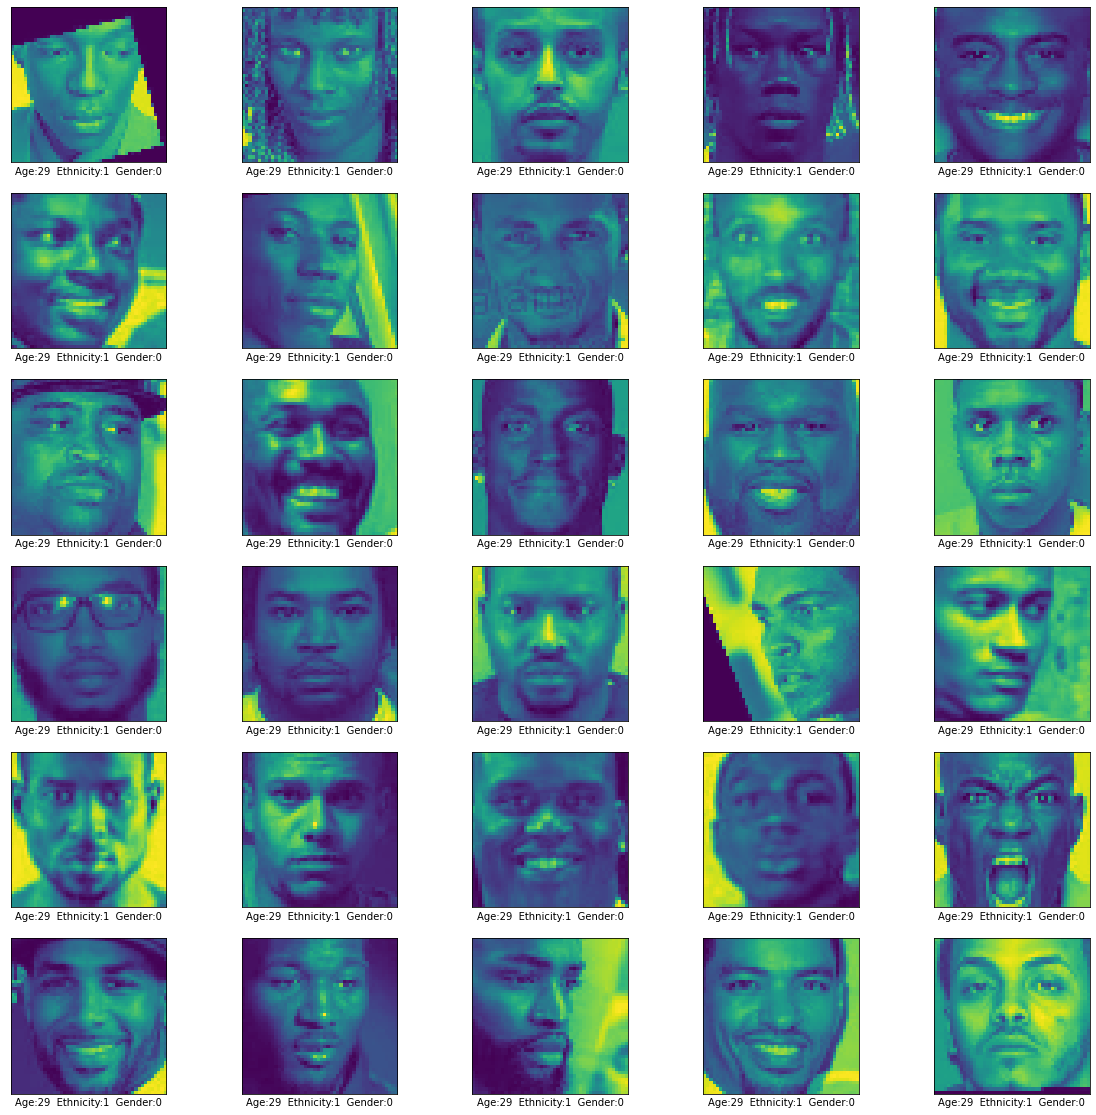

In [41]:
plt.figure(figsize=(20,20))
for i in range(10000,10030):
    plt.subplot(6,5,(i%30)+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(df['pixels'].iloc[i].reshape(48,48))
    plt.xlabel(
        "Age:"+str(df['age'].iloc[i])+
        "  Ethnicity:"+str(df['ethnicity'].iloc[i])+
        "  Gender:"+ str(df['gender'].iloc[i])
    )
plt.show()

In [43]:
gender_y=df["gender"]

In [46]:
from sklearn.model_selection import train_test_split

x_gender_train, x_gender_test, y_gender_train, y_gender_test = train_test_split(x, gender_y, test_size=0.1, random_state=42)

In [12]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU

In [52]:
classifier = Sequential()

In [53]:
classifier.add(Convolution2D(32,kernel_size=(3,3),input_shape=(48,48,1),activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(Convolution2D(64,kernel_size=(3,3),activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(Convolution2D(128,kernel_size=(3,3),activation='relu'))
classifier.add(Flatten())
classifier.add(Dense(128,activation='relu'))
classifier.add(Dense(1,activation='sigmoid'))
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [55]:
classifier.compile(optimizer='sgd',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [16]:
from keras.callbacks import EarlyStopping,ModelCheckpoint

stop = EarlyStopping(
    monitor='val_accuracy', 
    mode='max',
    patience=6
)

checkpoint= ModelCheckpoint(
    filepath='./',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [69]:
history = classifier.fit(x_gender_train, y_gender_train, epochs=20, validation_split=0.1, batch_size=64, callbacks = [stop, checkpoint])

Epoch 1/20
300/300 [==============================] - 139s 458ms/step - loss: 0.6857 - accuracy: 0.5930 - val_loss: 0.6760 - val_accuracy: 0.6392
Epoch 2/20
300/300 [==============================] - 153s 509ms/step - loss: 0.6549 - accuracy: 0.6605 - val_loss: 0.6190 - val_accuracy: 0.6949
Epoch 3/20
300/300 [==============================] - 132s 441ms/step - loss: 0.6032 - accuracy: 0.6813 - val_loss: 0.5693 - val_accuracy: 0.7216
Epoch 4/20
300/300 [==============================] - 128s 427ms/step - loss: 0.5647 - accuracy: 0.7150 - val_loss: 0.5526 - val_accuracy: 0.7235
Epoch 5/20
300/300 [==============================] - 131s 436ms/step - loss: 0.5100 - accuracy: 0.7603 - val_loss: 0.4692 - val_accuracy: 0.7919
Epoch 6/20
300/300 [==============================] - 127s 425ms/step - loss: 0.4626 - accuracy: 0.7885 - val_loss: 0.4357 - val_accuracy: 0.8032
Epoch 7/20
300/300 [==============================] - 127s 425ms/step - loss: 0.4305 - accuracy: 0.8078 - val_loss: 0.4159 -

In [70]:
loss, acc = classifier.evaluate(x_gender_test,y_gender_test,verbose=0)

In [71]:
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

Test loss: 0.31740802526474
Test Accuracy: 0.8658793568611145


In [76]:
pred_test_gender=[]
for test in x_gender_test:
    pred=classifier.predict(test.reshape(1,48,48,1))
    if pred>0.5:
        pred_test_gender.append(1)
    else:
        pred_test_gender.append(0)

In [77]:
pred_test_gender[0]

1

In [78]:
y_gender_test.iloc[0]

1

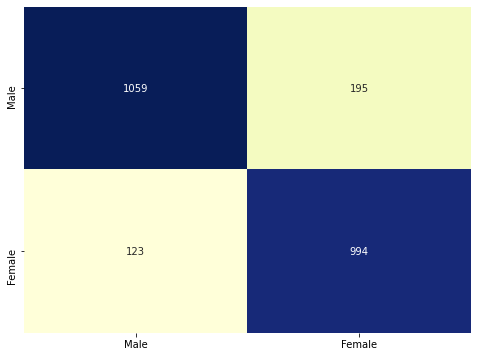

In [79]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
cmat = confusion_matrix(y_gender_test, pred_test_gender)
plt.figure(figsize=(8,6))
sns.heatmap(cmat, annot = True, cbar = False, cmap='YlGnBu', fmt="d", xticklabels=["Male","Female"], yticklabels=["Male","Female"]);

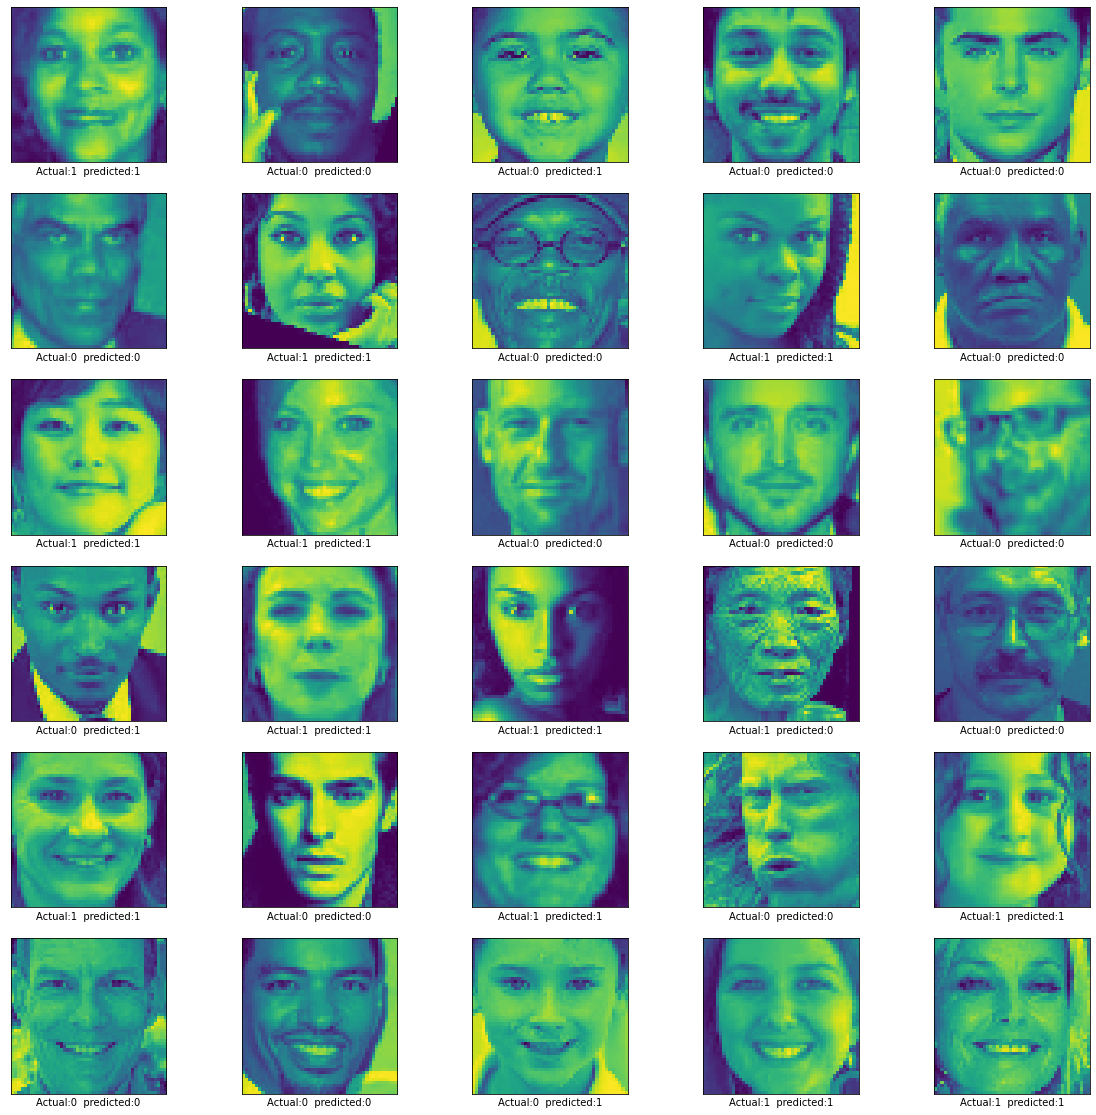

In [80]:
plt.figure(figsize=(20,20))
for i in range(0,30):
    plt.subplot(6,5,(i%30)+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_gender_test[i])
    plt.xlabel(
        "Actual:"+str(y_gender_test.iloc[i])+"  predicted:"+str(pred_test_gender[i])
    )
plt.show()

<ipython-input-81-859c3a2f127a>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(6,5,(i%30)+1)


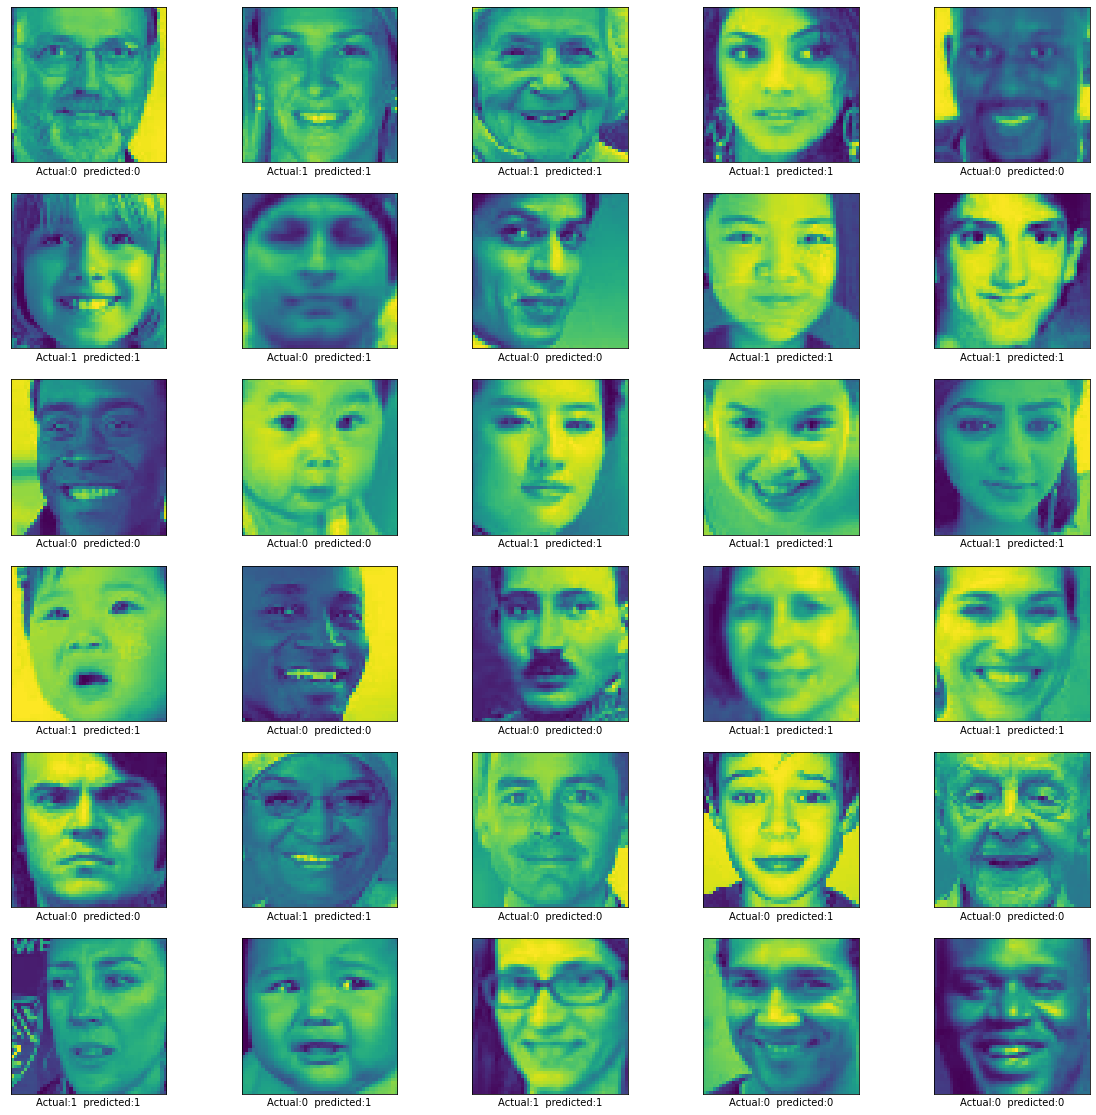

In [81]:
plt.figure(figsize=(20,20))
for i in range(200,250):
    plt.subplot(6,5,(i%30)+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_gender_test[i])
    plt.xlabel(
        "Actual:"+str(y_gender_test.iloc[i])+"  predicted:"+str(pred_test_gender[i])
    )
plt.show()